<a href="https://colab.research.google.com/github/joaoteixeiraGIT/ML_Model_WarrantyClaims/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/warranty_claims.csv')

After import the dataset, I should check if there are columns that aren't needed. If so, i need to remove them.

In [ ]:
# Remove the 'ID' column
data = data.drop('ID', axis=1)
data

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,Rural,Personal,Household,AC,0.0,1.0,2.0,0.0,0.0,0.0,4474.0,12.0,202.0,Manufacturer,30.0,Claim,0
1,Urban,Personal,Entertainment,TV,0.0,0.0,0.0,1.0,1.0,1.0,25000.0,13.0,60.0,Dealer,1.3,Complaint,0
2,Rural,Business,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,12.0,3.0,Dealer,2.5,Claim,0
3,Rural,Personal,Entertainment,TV,0.0,0.0,0.0,1.0,1.0,0.0,4216.0,10.0,672.0,Dealer,25.0,Other,0
4,Rural,Business,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,13.0,3.0,Manufacturer,6.5,Claim,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,Urban,Personal,Household,AC,0.0,1.0,1.0,0.0,0.0,0.0,10000.0,14.0,15.0,Dealer,2.6,Claim,0
8337,Rural,Personal,Household,AC,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,13.0,4.0,Manufacturer,1.3,Complaint,0
8338,Urban,Personal,Household,AC,0.0,1.0,0.0,0.0,0.0,0.0,2000.0,12.0,61.0,Dealer,24.0,Claim,0
8339,Urban,Personal,Household,AC,1.0,1.0,1.0,0.0,0.0,0.0,6000.0,15.0,280.0,Dealer,21.0,Complaint,0


In [ ]:
# Check for missing values in each column
missing_values = data.isna().sum()
print(missing_values)

Area                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64


After executing the piece of code above, I can say that there are 240 cells that haven't a value in the column claim value. For that, I will fill with values of the mean of this column.


In [ ]:
data['Claim_Value'].fillna(data['Claim_Value'].mean(), inplace=True)
#The inplace = true ensures that the changes are applied directly to the DataFrame

# Check for missing values again
missing_values = data.isna().sum()
print(missing_values)

Area                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64


Now, to check if the data is normalized, I need to plot an histogram for each numercial feature. If the histogram is bell shaped then the data is normalized, if not I need to normalize it.

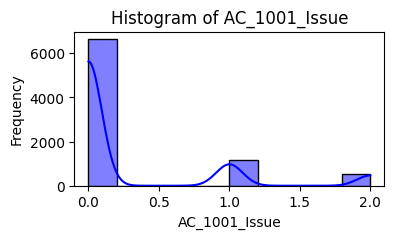

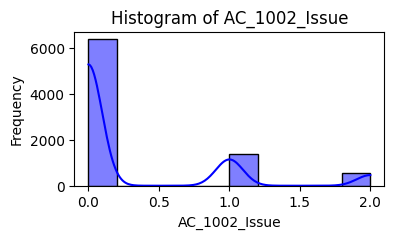

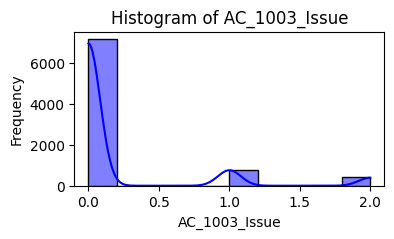

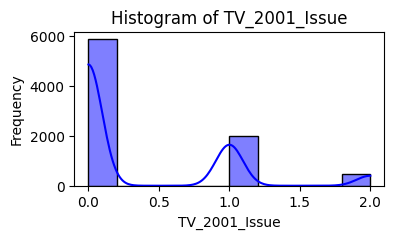

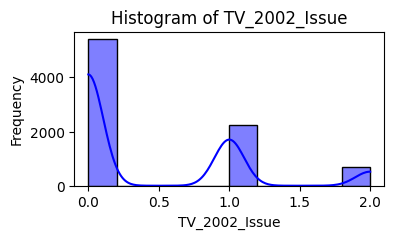

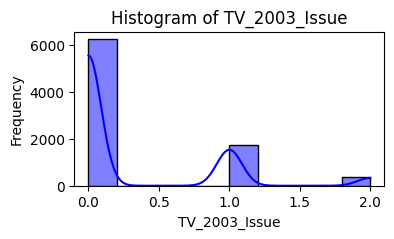

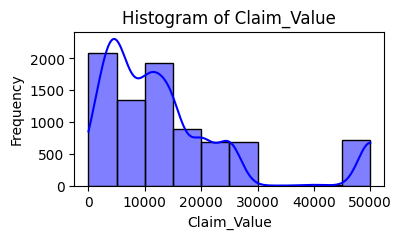

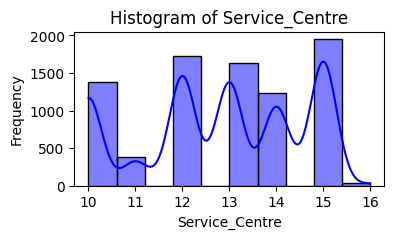

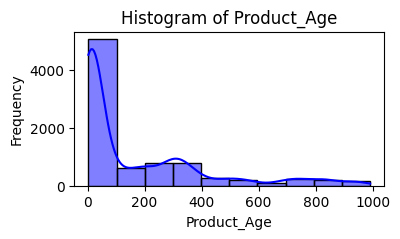

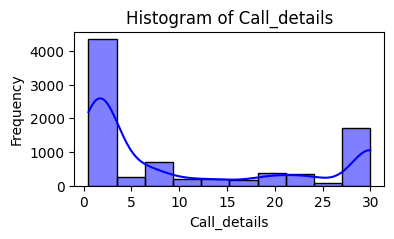

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #used for put a curve in the histograms

numerical_columns = ["AC_1001_Issue", "AC_1002_Issue", "AC_1003_Issue", "TV_2001_Issue",
                    "TV_2002_Issue", "TV_2003_Issue", "Claim_Value", "Service_Centre",
                    "Product_Age", "Call_details"]

# Plot histograms for each selected column
for column in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[column], bins = 10, kde=True, color='blue') #kde=True is for include the curve
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

As its possible to see the histograms are not bell shaped, so I need to normalize the data. "Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve)."

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize the selected columns in the original DataFrame
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

After normalize it, I need to one-hot encoded the data. Why sould I do this?
"Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric."
So "one hot encoding is used to convert categorical data to integer data." Thats why I gave the name numerical_columns and categorical_columns to the variables.

In [ ]:
#One hot enconded with Pandas
categorical_columns = ["Area", "Consumer_profile", "Product_category", "Product_type",
                       "Purchased_from", "Purpose"]

# Perform one-hot encoding with function from Pandas
data = pd.get_dummies(data, columns=categorical_columns)
# Check if I was sucessfull
print(data.head())

#-------------------------------------------------------------------------------------
#One hot encoded with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define columns
categorical_features = data.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

   AC_1001_Issue  AC_1002_Issue  AC_1003_Issue  TV_2001_Issue  TV_2002_Issue  \
0      -0.469372       1.191246       3.615998      -0.603106      -0.676689   
1      -0.469372      -0.511905      -0.379635       1.099266       0.885953   
2      -0.469372      -0.511905      -0.379635      -0.603106      -0.676689   
3      -0.469372      -0.511905      -0.379635       1.099266       0.885953   
4      -0.469372      -0.511905      -0.379635      -0.603106      -0.676689   

   TV_2003_Issue  Claim_Value  Service_Centre  Product_Age  Call_details  ...  \
0      -0.542318    -0.736238       -0.482493     0.140535      1.661648  ...   
1       1.288306     0.841687        0.097319    -0.456859     -0.810462  ...   
2      -0.542318    -0.311430       -0.482493    -0.696659     -0.707099  ...   
3      -0.542318    -0.756072       -1.642116     2.117826      1.230966  ...   
4      -0.542318     0.457315        0.097319    -0.696659     -0.362554  ...   

   Product_category_Household  P

Now, for training and evaluating the predictive model, I need to split my dataset into input features (X) and the target feature (y). X are all columns except the Fraud column, this one is the target. I will also separate the dataset into a training set and a testing set. The training set is used to train the model, and the testing set is used to evaluate the performance.

In [ ]:
X = data.drop("Fraud", axis=1)
y = data["Fraud"]

#The train_test_split function is specifically designed to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

#Split the data into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 In the previous piece of code setting a specific random_state value means that every time I run this code, the data will be split in the same way. It helps in obtaining consistent and comparable results.

Now, I want to use 5 fold cross-validation and evaluate the logistic regression algorithm. I will evaluate all the algorithms using the following metrics: Accuracy, F1-score, and AUC.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

#Create an instance of the Logistic Regression model, again with a fixed random state for reproducibility.
model = LogisticRegression(random_state=42)

#Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

#Perform 5-fold cross-validation and obtain scores for each metric
cross_val_results = cross_validate(model, X, y, cv=5, scoring=scoring)

print("Cross-Validation Results:")
print(f"Accuracy: {cross_val_results['test_accuracy'].mean():.4f} (std: {cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {cross_val_results['test_f1_score'].mean():.4f} (std: {cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {cross_val_results['test_roc_auc'].mean():.4f} (std: {cross_val_results['test_roc_auc'].std():.4f})")



Cross-Validation Results:
Accuracy: 0.9095 (std: 0.0014)
F1 Score: 0.0000 (std: 0.0000)
AUC: 0.4942 (std: 0.0008)


Testing with RandomForest Algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_cross_val_results = cross_validate(rf_model, X, y, cv=5, scoring=scoring)

print("Random Forest Cross-Validation Results:")
print(f"Accuracy: {rf_cross_val_results['test_accuracy'].mean():.4f} (std: {rf_cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {rf_cross_val_results['test_f1_score'].mean():.4f} (std: {rf_cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {rf_cross_val_results['test_roc_auc'].mean():.4f} (std: {rf_cross_val_results['test_roc_auc'].std():.4f})")



Random Forest Cross-Validation Results:
Accuracy: 0.9763 (std: 0.0019)
F1 Score: 0.8460 (std: 0.0147)
AUC: 0.9042 (std: 0.0190)


Testing k-Nearest Neighbors (k-NN) Algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_cross_val_results = cross_validate(knn_model, X, y, cv=5, scoring=scoring)

print("k-NN Cross-Validation Results:")
print(f"Accuracy: {knn_cross_val_results['test_accuracy'].mean():.4f} (std: {knn_cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {knn_cross_val_results['test_f1_score'].mean():.4f} (std: {knn_cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {knn_cross_val_results['test_roc_auc'].mean():.4f} (std: {knn_cross_val_results['test_roc_auc'].std():.4f})")



k-NN Cross-Validation Results:
Accuracy: 0.9710 (std: 0.0010)
F1 Score: 0.8052 (std: 0.0094)
AUC: 0.8712 (std: 0.0168)


Testing with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_cross_val_results = cross_validate(nb_model, X, y, cv=5, scoring=scoring)

print("Naive Bayes Cross-Validation Results:")
print(f"Accuracy: {nb_cross_val_results['test_accuracy'].mean():.4f} (std: {nb_cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {nb_cross_val_results['test_f1_score'].mean():.4f} (std: {nb_cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {nb_cross_val_results['test_roc_auc'].mean():.4f} (std: {nb_cross_val_results['test_roc_auc'].std():.4f})")



Naive Bayes Cross-Validation Results:
Accuracy: 0.4890 (std: 0.0096)
F1 Score: 0.2260 (std: 0.0058)
AUC: 0.6922 (std: 0.0116)


Testing with Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_cross_val_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

print("Support Vector Machine (SVM) Cross-Validation Results:")
print(f"Accuracy: {svm_cross_val_results['test_accuracy'].mean():.4f} (std: {svm_cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {svm_cross_val_results['test_f1_score'].mean():.4f} (std: {svm_cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {svm_cross_val_results['test_roc_auc'].mean():.4f} (std: {svm_cross_val_results['test_roc_auc'].std():.4f})")



Support Vector Machine (SVM) Cross-Validation Results:
Accuracy: 0.9658 (std: 0.0030)
F1 Score: 0.7502 (std: 0.0274)
AUC: 0.8197 (std: 0.0248)


Testing with Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_cross_val_results = cross_validate(gb_model, X, y, cv=5, scoring=scoring)

print("Gradient Boosting Cross-Validation Results:")
print(f"Accuracy: {gb_cross_val_results['test_accuracy'].mean():.4f} (std: {gb_cross_val_results['test_accuracy'].std():.4f})")
print(f"F1 Score: {gb_cross_val_results['test_f1_score'].mean():.4f} (std: {gb_cross_val_results['test_f1_score'].std():.4f})")
print(f"AUC: {gb_cross_val_results['test_roc_auc'].mean():.4f} (std: {gb_cross_val_results['test_roc_auc'].std():.4f})")



Gradient Boosting Cross-Validation Results:
Accuracy: 0.9722 (std: 0.0043)
F1 Score: 0.8019 (std: 0.0329)
AUC: 0.8512 (std: 0.0223)


In this [Google Sheets](https://docs.google.com/spreadsheets/d/172tNm4VUseAgOHv8esVGoDEqf_cyBYQzk6x7ii308Oc/edit?usp=sharing), I registered the performance of the algorithms and did my analisys to each one.

After analysed all of the algorithms, the best one was Random Forest, with the highest values for accuracy, F1-score, and AUC. I create a pipeline to train it on the complete dataset.

In [ ]:
# Import necessary modules and classes from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop("Fraud", axis=1)
y = data["Fraud"]

# Define numerical and categorical columns
numerical_columns = ["AC_1001_Issue", "AC_1002_Issue", "AC_1003_Issue", "TV_2001_Issue",
                    "TV_2002_Issue", "TV_2003_Issue", "Claim_Value", "Service_Centre",
                    "Product_Age", "Call_details"]

categorical_columns = ["Area", "Consumer_profile", "Product_category", "Product_type",
                       "Purchased_from", "Purpose"]

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the final pipeline with the preprocessor and the model (Random Forest classifier)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Initialize Random Forest classifier
])

# Train the pipeline
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AC_1001_Issue',
                                                   'AC_1002_Issue',
                                                   'AC_1003_Issue',
                                                   'TV_2001_Issue',
                                                   'TV_2002_Issue',
                                                   'TV_2003_Issue',
                                                   'Claim_Value',
                                                   'Service_Centre',
                                                   'Product_Age',
                                                   'Call_details']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Consumer_profile',
                                                   'Product_category',
                                                   'Product_type',
                                                   'Purchased_from',
                                                   'Purpose'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

To serialize complete pipeline with pickle to save my trained model. I can do this:

In [ ]:
import pickle

# Train the pipeline on the complete dataset
pipeline.fit(X, y)

# Serialize the pipeline to a file
with open('/content/drive/MyDrive/Colab Notebooks/FraudDetectionModel_pipeline.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)
